In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv("/Users/janhavijadhav/Documents/product-sentiment-analysis/data/Reviews.csv")

# Quick preview
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# Number of rows and columns
print("Dataset shape:", df.shape)

# Column info
df.info()


Dataset shape: (568454, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
# Count missing values in each column
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [11]:
# Keep only Text and Score columns
df_reviews = df[['Text', 'Score']].copy()

# Preview the dataset
df_reviews.head()


,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [13]:
# Function to map scores to sentiment labels
def map_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply function to create new column
df_reviews['Sentiment'] = df_reviews['Score'].apply(map_sentiment)

# Preview the new dataset
df_reviews.head()


,Text,Score,Sentiment
0,I have bought several of the Vitality canned d...,5,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,Negative
2,This is a confection that has been around a fe...,4,Positive
3,If you are looking for the secret ingredient i...,2,Negative
4,Great taffy at a great price. There was a wid...,5,Positive


In [15]:
df_reviews['Sentiment'].value_counts()


Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

In [17]:
import re          # For regular expressions (removing punctuation, numbers)
import nltk        # Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only first time)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janhavijadhav/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/janhavijadhav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/janhavijadhav/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
#Define Cleaning Function

In [23]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # 4. Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join back into a single string
    return ' '.join(words)


In [25]:
#Cleaning to Dataset

In [27]:
# Apply cleaning function to the Text column
df_reviews['Cleaned_Text'] = df_reviews['Text'].apply(clean_text)

# Preview the cleaned text
df_reviews[['Text', 'Cleaned_Text']].head()


,Text,Cleaned_Text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


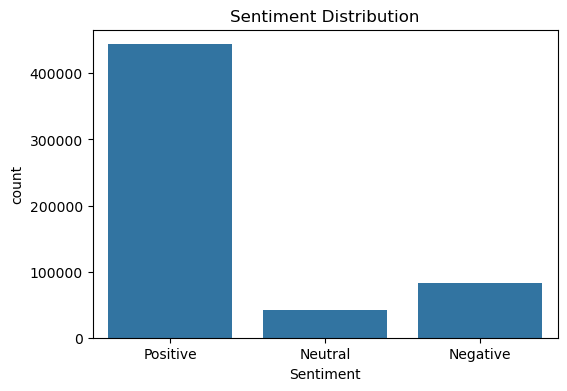

In [33]:
# Plot sentiment label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df_reviews, order=['Positive','Neutral','Negative'])
plt.title('Sentiment Distribution')
plt.show()


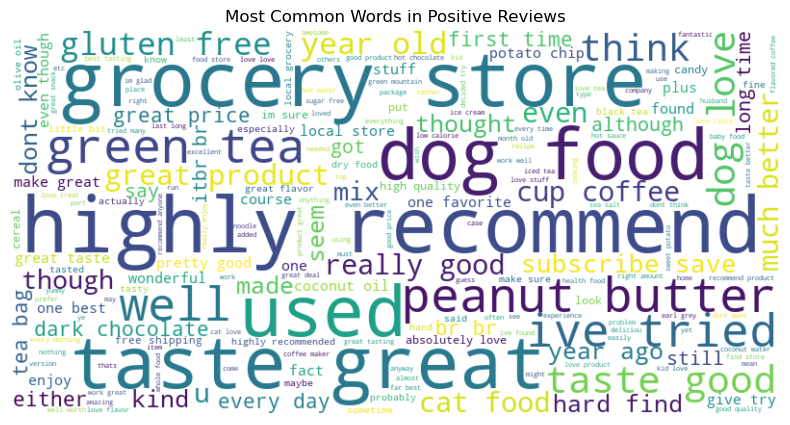

In [35]:
positive_text = ' '.join(df_reviews[df_reviews['Sentiment'] == 'Positive']['Cleaned_Text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()


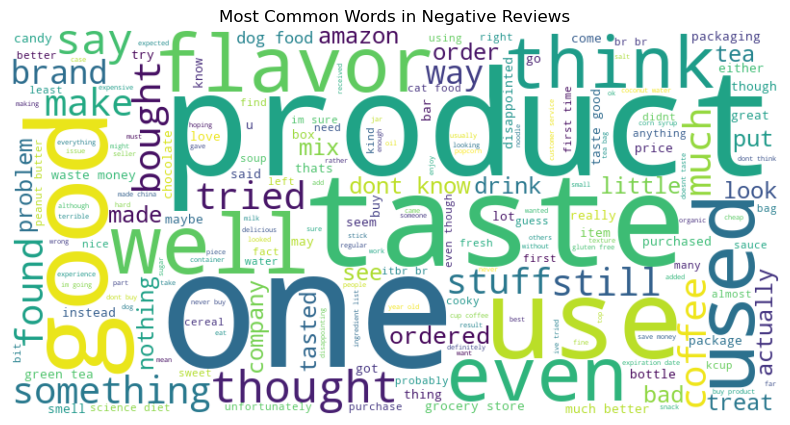

In [40]:
# Negative Reviews Word Cloud
negative_text = ' '.join(df_reviews[df_reviews['Sentiment'] == 'Negative']['Cleaned_Text'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()


In [42]:
# split data

from sklearn.model_selection import train_test_split

X = df_reviews['Cleaned_Text']
y = df_reviews['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (454763,)
Testing samples: (113691,)


In [44]:
# Apply TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,   # limit vocabulary size
    ngram_range=(1,2)    # unigrams + bigrams
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)


(454763, 5000)


In [46]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize model
log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

# Train model
log_reg.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1)

In [48]:
# Predict on test data
y_pred = log_reg.predict(X_test_tfidf)

y_pred[:10]


array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype=object)

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.8698753639250248
              precision    recall  f1-score   support

    Negative       0.75      0.69      0.71     16407
     Neutral       0.53      0.20      0.30      8528
    Positive       0.90      0.97      0.93     88756

    accuracy                           0.87    113691
   macro avg       0.72      0.62      0.65    113691
weighted avg       0.85      0.87      0.85    113691



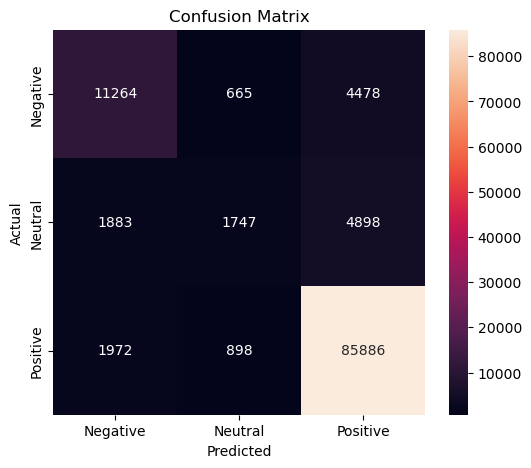

In [52]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [62]:
#Balanced
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression with class weights
lr_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

# IMPORTANT: Use TF-IDF features
lr_balanced.fit(X_train_tfidf, y_train)

# Predictions
y_pred_balanced = lr_balanced.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


Accuracy: 0.7883121795040944
              precision    recall  f1-score   support

    Negative       0.64      0.74      0.68     16407
     Neutral       0.27      0.65      0.38      8528
    Positive       0.97      0.81      0.88     88756

    accuracy                           0.79    113691
   macro avg       0.63      0.73      0.65    113691
weighted avg       0.87      0.79      0.82    113691



In [60]:
# Train Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize model
nb_model = MultinomialNB()

# Train
nb_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.8235392423322866
              precision    recall  f1-score   support

    Negative       0.82      0.32      0.46     16407
     Neutral       0.59      0.01      0.03      8528
    Positive       0.82      0.99      0.90     88756

    accuracy                           0.82    113691
   macro avg       0.74      0.44      0.47    113691
weighted avg       0.81      0.82      0.77    113691



In [64]:
# TF-IDF with Unigrams + Bigrams
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF with bigrams
tfidf_bigram = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1, 2),
    min_df=5
)

X_train_tfidf_bg = tfidf_bigram.fit_transform(X_train)
X_test_tfidf_bg = tfidf_bigram.transform(X_test)

X_train_tfidf_bg.shape


(454763, 7000)

In [66]:
# Train Logistic Regression (Bigram TF-IDF)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression with class balancing
lr_bigram = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

# Train on bigram TF-IDF features
lr_bigram.fit(X_train_tfidf_bg, y_train)

# Predict
y_pred_bg = lr_bigram.predict(X_test_tfidf_bg)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_bg))
print(classification_report(y_test, y_pred_bg))


Accuracy: 0.7968616689095883
              precision    recall  f1-score   support

    Negative       0.65      0.75      0.70     16407
     Neutral       0.28      0.66      0.40      8528
    Positive       0.97      0.82      0.89     88756

    accuracy                           0.80    113691
   macro avg       0.63      0.74      0.66    113691
weighted avg       0.87      0.80      0.82    113691



In [68]:
# Extract Most Important Words
import numpy as np

# Get feature names
feature_names = np.array(tfidf_bigram.get_feature_names_out())

# Get coefficients
coefs = lr_bigram.coef_

# For each class, get top words
for i, label in enumerate(lr_bigram.classes_):
    top_positive = feature_names[np.argsort(coefs[i])[-10:]]
    top_negative = feature_names[np.argsort(coefs[i])[:10]]

    print(f"\nClass: {label}")
    print("Top Positive Indicators:", top_positive)
    print("Top Negative Indicators:", top_negative)



Class: Negative
Top Positive Indicators: ['gross' 'horrible' 'disgusting' 'never buy' 'yuck' 'disappointing'
 'awful' 'terrible' 'worst' 'two star']
Top Negative Indicators: ['great' 'downside' 'delicious' 'three star' 'perfect' 'wont disappointed'
 'excellent' 'best' 'highly recommend' 'nice']

Class: Neutral
Top Positive Indicators: ['average' 'best ever' 'nothing special' 'experimenting' 'get wrong'
 'however' 'vinegar chip' 'okay' 'ok' 'three star']
Top Negative Indicators: ['one star' 'star instead' 'four star' 'wasnt sure' 'kidding' 'peppered'
 'garbage' 'definitely recommend' 'definitely buying' 'ever']

Class: Positive
Top Positive Indicators: ['well worth' 'excellent' 'skeptical' 'hooked' 'great' 'four star'
 'wasnt sure' 'delicious' 'perfect' 'wont disappointed']
Top Negative Indicators: ['worst' 'wont buying' 'disappointing' 'unfortunately' 'three star'
 'disappointed' 'two star' 'disappointment' 'ok' 'mediocre']


In [70]:
import joblib

# Save Logistic Regression model
joblib.dump(lr_bigram, 'lr_bigram_model.pkl')

# Save TF-IDF vectorizer
joblib.dump(tfidf_bigram, 'tfidf_bigram.pkl')


['tfidf_bigram.pkl']